In [9]:
# importer pakkene
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [10]:
# Etterspørselsfunksjon

def x_d(p):
    return 500 - 3.2*p

#Tilbudsfunksjon

def x_s(p,t):
    return -100+4.3*p*(1-t)

In [ ]:
# vi lager en basisfigur

p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.legend(bbox_to_anchor=(1.5,0.6));

### OPPGAVE 1

##### Tegn inn tilbudsfunksjon med 25% mva, og forklar hvorfor denne har brattere helning enn tilbudsfunksjon uten mva (t=0)

In [11]:
# setter mva verdi 
mva = 0.25

# setter tilbudsfunksjonen med mva
def demand_mva(p,t):
    return -100+4.3*p*(1-t)*(1-mva)


In [12]:
# lager axer
fig, ax1 = create_ax()

# plotter funksjonene

ax1.plot(x_d(p_num),p_num, label='Etterspørsel')

ax1.plot(x_s(p_num, 0),p_num, label='Tilbud')

# plotter tilbudsfunksjonen med mva

ax1.plot(demand_mva(p_num, 0),p_num, label='Tilbud med mva')
ax1.legend(bbox_to_anchor=(1,1));


NameError: name 'create_ax' is not defined

##### Her kan vi se en graf som viser en tilbudsfunksjon, en etterspørselsfunksjon og en tilbudsfunksjon med merverdiavgift. Hvorfor "Tilbud med mva" hart en brattere helning enn "tilbud" kommer av at med en avgift som mva vil kostnadene bli dyrere som fører til at prisen stiger, dette gir en brattere helning. 

### OPPGAVE 2

##### Beregn likevektspris og -kvantum med og uten mva, og vis disse i figuren.

In [54]:
#Regner ut likningssettet for å få likevektsprisen

from sympy import symbols, Eq, solve

x, p, t, d, s = symbols('x p t d s')

eq1 = Eq(x, 500 - 3.2*p)
eq2 = Eq(x, -100 + 4.3*p)
eq3 = Eq(eq1, eq2)

solve((eq1, eq2, eq3), (x, p))


{x: 244.000000000000, p: 80.0000000000000}

In [57]:
# setter likevektsprisen inn i funksjonen for å få kvantum verdien 
500-3.2*80

244.0

In [56]:
# regner ut likningssettet for å få likevektsprisen, med mva

from sympy import symbols, Eq, solve

mva = 0.25

x, p, t, d, s = symbols('x p t d s')

eq1 = Eq(x, 500 - 3.2*p)
eq2 = Eq(x, -100 + 4.3*p*(1-mva))
eq3 = Eq(eq1, eq2)

solve((eq1, eq2, eq3), (x, p))

{x: 201.167315175097, p: 93.3852140077821}

In [58]:
# setter likevektsprisen inn i funksjonen for å få kvantum verdien, med mva
500-3.2*93.3852140077821

201.16731517509726

#### Resultater:

##### Likevektspris, p = 80
##### Likevektspris med mva, p = 93.3852140077821
##### Kvantum, p = 80 -> 244
##### Kvantum med mva, p = 93.3852140077821 -> 201.16731517509726

Text(201.167315175097, 93.3852140077821, 'Likevekt med mva')

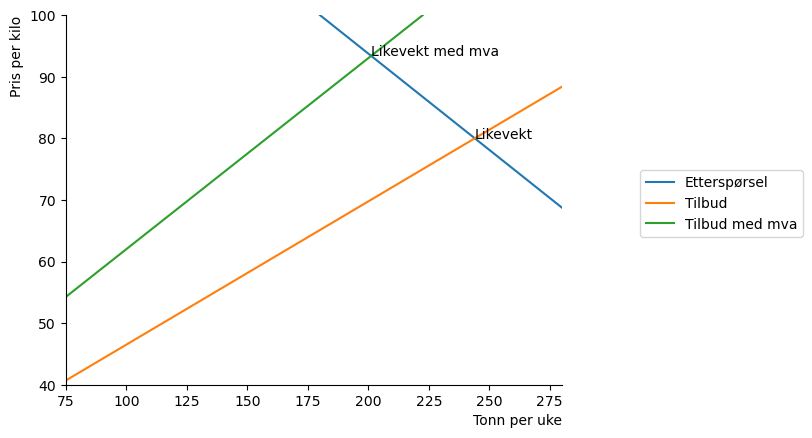

In [142]:

# lager samme plot som sist
fig, ax1 = create_ax()

ax1.plot(x_d(p_num),p_num, label='Etterspørsel')

ax1.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax1.plot(demand_mva(p_num, 0),p_num, label='Tilbud med mva')
ax1.legend(bbox_to_anchor=(1.5,0.6));



# setter inn likevektsverdiene
ax1.text(244.0, 80, "Likevekt")
ax1.text(201.167315175097, 93.3852140077821, "Likevekt med mva")

### OPPGAVE 3

##### Beregn og vis inntekten til staten, og andelen som betales av konsumenter og produsenter.

In [261]:
#prisen som konsumentene får er 93.osv
93.3852140077821*0.25

23.346303501945524

In [262]:
#prisen produsenten mottar
93.2852140077821-23.346303501945524

69.93891050583657

In [269]:
a = 93.2852140077821-80

b = 80-69.93891050583657

print(a, b)
print("med kvantum 201.167315175097")

13.285214007782102 10.061089494163426
med kvantum 201.167315175097


##### Konsumentene betaler 93.2852140077821, produsentene betaler 69.93891050583657

### OPPGAVE 4

##### Hva er fordeler/ulemper av en mva og en stykkprisavgift?

##### Fordel mva : 
##### 1. Øker statens inntekter. 2. Enkel å administrere. 3. Fast verdi uansett

##### Fordel stykkprisavgift:
##### 1. Gir en mer rettferdig beskatning, siden den tar hensyn til kjøpekraft. 2. Kan være mer bærekraftig produksjon

##### Ulemper mva:
##### 1. Øker totalkostnadene for forbrukerne

##### Ulemper stykkprisavgift:
##### 1. Kan være komplisert å administrere og innføre.